# IT 350
## Assignment 4

### Name: Niraj Nandish
### Roll no.: 191IT234
### Batch no.: 7


Link to Colab notebook - https://colab.research.google.com/drive/1r7tHEf3k3quMNWdz1dZiAWKD6wwD5UWL?usp=sharing

## 1. Find the clusters in the given dataset based on the content similarity and image similarity using k-means clustering and hierarchical clustering methods.

In [1]:
!pip install pytesseract
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [2]:
import pytesseract
from glob import glob
import pandas as pd
from PIL import Image
from pprint import pprint

from google.colab import drive
drive.mount('/content/drive')

images = glob("/content/drive/MyDrive/Assignment 4 Clustering/Q2_Clusters/Cluster_1/*")
pprint(images)
data = pd.DataFrame({"FileName": images})
imageText = []
for img in images:
    text = pytesseract.image_to_string(Image.open(img))
    imageText.append(text.replace("\n", ""))
data["Text"] = imageText
pprint(imageText)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['/content/drive/MyDrive/Assignment 4 '
 'Clustering/Q2_Clusters/Cluster_1/191IT253.2.jpeg',
 '/content/drive/MyDrive/Assignment 4 '
 'Clustering/Q2_Clusters/Cluster_1/191IT219.2.jpeg',
 '/content/drive/MyDrive/Assignment 4 '
 'Clustering/Q2_Clusters/Cluster_1/191IT229.2.jpeg',
 '/content/drive/MyDrive/Assignment 4 '
 'Clustering/Q2_Clusters/Cluster_1/191IT247.2.jpeg',
 '/content/drive/MyDrive/Assignment 4 '
 'Clustering/Q2_Clusters/Cluster_1/191IT209.2.jpg',
 '/content/drive/MyDrive/Assignment 4 '
 'Clustering/Q2_Clusters/Cluster_1/191IT134.2.jpeg',
 '/content/drive/MyDrive/Assignment 4 '
 'Clustering/Q2_Clusters/Cluster_1/191IT127.2',
 '/content/drive/MyDrive/Assignment 4 '
 'Clustering/Q2_Clusters/Cluster_1/191IT235.2.jpeg',
 '/content/drive/MyDrive/Assignment 4 '
 'Clustering/Q2_Clusters/Cluster_1/191IT128.2.jpeg',
 '/content/drive/MyDrive/Assignment 4 '


In [3]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data["Text"])

In [4]:
# K-means clustering
from sklearn.cluster import KMeans
data["Kmeans"] = KMeans(n_clusters=5, random_state=0).fit_predict(X.toarray())

In [5]:
data

,FileName,Text,Kmeans
0,/content/drive/MyDrive/Assignment 4 Clustering...,,0
1,/content/drive/MyDrive/Assignment 4 Clustering...,,0
2,/content/drive/MyDrive/Assignment 4 Clustering...,be thee Wah amahinWO) 2 Unt wod ¢WOW) F2uta wo...,0
3,/content/drive/MyDrive/Assignment 4 Clustering...,1 a hash. jumdioo hE) tush Saksee,0
4,/content/drive/MyDrive/Assignment 4 Clustering...,auceraenog mls. at Gedo 6alate ane) med €ace ...,2
5,/content/drive/MyDrive/Assignment 4 Clustering...,wnee aneweyQorper if te3Fist moth whae diate...,4
6,/content/drive/MyDrive/Assignment 4 Clustering...,"@@) Gfveur , Hirer har functtons ,AU) = A141 m...",1
7,/content/drive/MyDrive/Assignment 4 Clustering...,PapergrigDate: |,0
8,/content/drive/MyDrive/Assignment 4 Clustering...,bP,0
9,/content/drive/MyDrive/Assignment 4 Clustering...,Pet | Gaatang Cnet neei ? oN a SShtite3 / ate ...,3


In [6]:
# Agglomerative clustering
from sklearn.cluster import AgglomerativeClustering
data["Agglomerative"] = AgglomerativeClustering(n_clusters=4).fit_predict(X.toarray())

In [7]:
data

,FileName,Text,Kmeans,Agglomerative
0,/content/drive/MyDrive/Assignment 4 Clustering...,,0,0
1,/content/drive/MyDrive/Assignment 4 Clustering...,,0,0
2,/content/drive/MyDrive/Assignment 4 Clustering...,be thee Wah amahinWO) 2 Unt wod ¢WOW) F2uta wo...,0,0
3,/content/drive/MyDrive/Assignment 4 Clustering...,1 a hash. jumdioo hE) tush Saksee,0,0
4,/content/drive/MyDrive/Assignment 4 Clustering...,auceraenog mls. at Gedo 6alate ane) med €ace ...,2,2
5,/content/drive/MyDrive/Assignment 4 Clustering...,wnee aneweyQorper if te3Fist moth whae diate...,4,3
6,/content/drive/MyDrive/Assignment 4 Clustering...,"@@) Gfveur , Hirer har functtons ,AU) = A141 m...",1,1
7,/content/drive/MyDrive/Assignment 4 Clustering...,PapergrigDate: |,0,0
8,/content/drive/MyDrive/Assignment 4 Clustering...,bP,0,0
9,/content/drive/MyDrive/Assignment 4 Clustering...,Pet | Gaatang Cnet neei ? oN a SShtite3 / ate ...,3,0


## 2. Plot t-SNE visualization for derived clusters.

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import numpy as np
X_embedded = TSNE(n_components=2, init='pca').fit_transform(X.toarray().astype("float"))
X_pd = pd.DataFrame(X_embedded)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


In [9]:
X_pd

,0,1
0,-204.667938,-552.070923
1,-204.667938,-552.070923
2,-1438.736450,118.308029
3,-1037.713257,1094.138794
4,-37.757725,650.830383
5,1003.618408,1080.078369
6,840.637329,-1423.135132
7,1159.793213,-102.525795
8,1159.793213,-102.525795
9,-8.582541,1675.383179


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


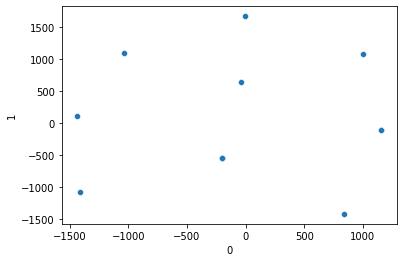

In [10]:
sns.scatterplot(X_pd[0], X_pd[1])

## 3. Evaluate the clusters that are obtained using appropriate methods. 

Performed clustering of answer sheet using pytesseract to recognize OCR text from images, and then used the extracted text to perform clustering. I used 2 types of clustering techniques K-means and Agglomerative clustering. Agglomerative clustering shows a wider distribution of papers into clusters than K-means. Since OCR detection is extremely poor and fails to identify text, I proceeded in checking similarity using image features.